In [1]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed
# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [2]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [3]:
df['species'].unique()

array(['HomoSapiens', 'MusMusculus', 'MacacaMulatta'], dtype=object)

In [4]:
pd.set_option('display.max_colwidth', None)
df[['meta']].head(3)

,meta
0,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*07:01,HLA-DRB*13:01"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""005"", ""tissue"": ""PBMC""}"
2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor.MHC"": ""HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:01;HLA-Cw*06:02,HLA-Cw*07:01;HLA-DRB*08:03:2,HLA-DRB*15:01:1"", ""donor.MHC.method"": """", ""epitope.id"": """", ""replica.id"": """", ""samples.found"": 1, ""structure.id"": """", ""studies.found"": 1, ""study.id"": """", ""subject.cohort"": ""HIV+"", ""subject.id"": ""065"", ""tissue"": ""PBMC""}"


In [5]:
pd.reset_option('display.max_colwidth')

filtered_df = df[df['complex.id'] == 4]
filtered_df.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
8,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


In [6]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(280, 14)

In [7]:
df.count()

complex.id         92771
gene               92771
cdr3               92771
v.segm             92670
j.segm             91626
species            92771
mhc.a              92771
mhc.b              92771
mhc.class          92771
antigen.epitope    92771
antigen.gene       92709
antigen.species    92771
vdjdb.score        92771
meta               92771
dtype: int64

### Dropping duplicate columns

In [8]:
# Drop duplicate rows
df=df.drop_duplicates()
df.shape

(92491, 14)

### Dropping missing and null value

In [9]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm               99
j.segm             1141
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [10]:
df=df.dropna()
df.shape

(91274, 14)

### Dropping low score data

In [11]:
df = df[(df['vdjdb.score'] == 2) | (df['vdjdb.score'] == 3)]
df.shape

(3871, 14)

In [12]:
df.columns

Index(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a',
       'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'],
      dtype='object')

In [13]:
df=df.dropna()
df.shape

(3871, 14)

**After dropping null value**
* Bulleted

In [14]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

>**## Exploring the data ##**

In [15]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'
filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(3)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
20263,1499,TRA,CALSHYSGTYKYIF,TRAV9-2*01,TRAJ40*01,HomoSapiens,HLA-DQA1*01:02,HLA-DQB1*05:02,MHCII,MHQKRTAMFQDPQER,E6,HPV-16,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
20264,1499,TRB,CASSEGTDYGYTF,TRBV6-1*01,TRBJ1-2*01,HomoSapiens,HLA-DQA1*01:02,HLA-DQB1*05:02,MHCII,MHQKRTAMFQDPQER,E6,HPV-16,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
20265,1500,TRA,CAENSGGSNYKLTF,TRAV13-2*01,TRAJ53*01,HomoSapiens,HLA-DRA*01,HLA-DRB5*01:01,MHCII,VVVGAVGVGKSALTIQLIQN,KRAS,HomoSapiens,2,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [16]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

In [17]:
df_dash.head(3)

,subject,epitope,count,v_a_gene,j_a_gene,cdr3_a_aa,cdr3_a_nucseq,v_b_gene,j_b_gene,cdr3_b_aa,cdr3_b_nucseq,clone_id
0,mouse_subject0050,PA,2,TRAV7-3*01,TRAJ33*01,CAVSLDSNYQLIW,tgtgcagtgagcctcgatagcaactatcagttgatctgg,TRBV13-1*01,TRBJ2-3*01,CASSDFDWGGDAETLYF,tgtgccagcagtgatttcgactggggaggggatgcagaaacgctgt...,mouse_tcr0072.clone
1,mouse_subject0050,PA,6,TRAV6D-6*01,TRAJ56*01,CALGDRATGGNNKLTF,tgtgctctgggtgacagggctactggaggcaataataagctgactttt,TRBV29*01,TRBJ1-1*01,CASSPDRGEVFF,tgtgctagcagtccggacaggggtgaagtcttcttt,mouse_tcr0096.clone
2,mouse_subject0050,PA,1,TRAV6D-6*01,TRAJ49*01,CALGSNTGYQNFYF,tgtgctctgggctcgaacacgggttaccagaacttctatttt,TRBV29*01,TRBJ1-5*01,CASTGGGAPLF,tgtgctagcacagggggaggggctccgcttttt,mouse_tcr0276.clone


## Installing tcrdist3 package ##

In [18]:
# pip install tcrdist3
# installing tcrdist3

In [19]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')
# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [20]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [21]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text data frame for tcrdist3

In [22]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [23]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene','mhc.a','mhc.b']]

In [24]:
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,mhc.a,mhc.b
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M


# Separating data set in to alpha and beta dataframe

In [25]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene','antigen.epitope':'epitope'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene','antigen.epitope':'epitope'})

# df = df.rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})
# df.drop([ 'cdr3', 'v.segm', 'j.segm'], axis=1, inplace=True)
df = pd.concat([df_alpha, df_beta], ignore_index=True)
df

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,mhc.a,mhc.b,cdr3_b_aa,v_b_gene,j_b_gene
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M,NaN,NaN,NaN
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M,NaN,NaN,NaN
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M,NaN,NaN,NaN
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HLA-B*08,B2M,NaN,NaN,NaN
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HLA-B*08,B2M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,30550,TRB,NaN,NaN,NaN,HomoSapiens,PQPELPYPQPQL,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01
3867,30551,TRB,NaN,NaN,NaN,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01
3868,30552,TRB,NaN,NaN,NaN,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01
3869,30554,TRB,NaN,NaN,NaN,HomoSapiens,QLQPFPQPELPY,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01


In [26]:
df_alpha.reset_index(drop=True, inplace=True)
df_beta.reset_index(drop=True, inplace=True)
df.reset_index(drop=True,inplace=True)

In [27]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,mhc.a,mhc.b
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HLA-B*08,B2M
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HLA-B*08,B2M
...,...,...,...,...,...,...,...,...,...,...
1376,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01
1377,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01
1378,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01
1379,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01


In [28]:
df_alpha['species'].unique()


array(['HomoSapiens', 'MusMusculus'], dtype=object)

# Removing mouse and monkey

In [29]:
df = df[~df['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [30]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [31]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex.id    1316 non-null   int64 
 1   gene          1316 non-null   object
 2   cdr3_a_aa     1316 non-null   object
 3   v_a_gene      1316 non-null   object
 4   j_a_gene      1316 non-null   object
 5   species       1316 non-null   object
 6   epitope       1316 non-null   object
 7   antigen.gene  1316 non-null   object
 8   mhc.a         1316 non-null   object
 9   mhc.b         1316 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.1+ KB


## Dropping null values

In [32]:
df_alpha=df_alpha.dropna()
print(df_alpha.isnull().sum())
df_beta=df_beta.dropna()

complex.id      0
gene            0
cdr3_a_aa       0
v_a_gene        0
j_a_gene        0
species         0
epitope         0
antigen.gene    0
mhc.a           0
mhc.b           0
dtype: int64


## Dropping duplicates

In [33]:
df_alpha=df_alpha.drop_duplicates()
df_beta=df_beta.drop_duplicates()
df=df.drop_duplicates()
df.shape

(3374, 13)

In [34]:
value_counts = df_alpha['epitope'].value_counts()

# 获取数量最多的前100个值
top_100_values = value_counts.head(80).index

# 使用这些最常见的值过滤DataFrame
filtered_df = df_alpha[df_alpha['epitope'].isin(top_100_values)]

# 打印结果，或进行进一步的处理
filtered_df

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,mhc.a,mhc.b
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M
9,77,TRA,CIVKTNSGGSNYKLTF,TRAV26-1*01,TRAJ53*01,HomoSapiens,TAAQAAVVRFQEAAN,CFP10,HLA-DQA1*01:02,HLA-DQB1*06:02
10,78,TRA,CIVHTNSGGSNYKLTF,TRAV26-1*01,TRAJ53*01,HomoSapiens,TAAQAAVVRFQEAAN,CFP10,HLA-DQA1*01:02,HLA-DQB1*06:02
...,...,...,...,...,...,...,...,...,...,...
1376,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01
1377,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01
1378,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01
1379,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01


## Run TCRDist on alpha gene dataset

In [35]:
from tcrdist.repertoire import TCRrep
tr_a = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_a.cpus=2
tr_a.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_a.rw_alpha)
tr_b = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances=False)
tr_b.cpus=2
tr_b.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
print(tr_b.rw_beta)

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/13 [00:00<?, ?it/s]

  (0, 0)	-1
  (1, 1)	-1
  (1, 2)	-1
  (2, 1)	-1
  (2, 2)	-1
  (3, 3)	-1
  (3, 4)	48
  (3, 465)	48
  (3, 592)	48
  (4, 3)	48
  (4, 4)	-1
  (4, 465)	24
  (4, 592)	24
  (5, 5)	-1
  (5, 92)	45
  (5, 93)	45
  (5, 780)	48
  (6, 6)	-1
  (6, 10)	48
  (6, 12)	45
  (6, 16)	48
  (6, 17)	48
  (6, 18)	48
  (6, 21)	48
  (6, 141)	48
  :	:
  (1284, 720)	29
  (1284, 721)	29
  (1284, 1284)	-1
  (1284, 1285)	42
  (1285, 58)	48
  (1285, 255)	48
  (1285, 349)	48
  (1285, 453)	44
  (1285, 580)	44
  (1285, 965)	48
  (1285, 1284)	42
  (1285, 1285)	-1
  (1285, 1286)	42
  (1286, 349)	42
  (1286, 1147)	24
  (1286, 1285)	42
  (1286, 1286)	-1
  (1287, 1287)	-1
  (1288, 1288)	-1
  (1289, 1289)	-1
  (1290, 412)	48
  (1290, 539)	48
  (1290, 1034)	36
  (1290, 1141)	48
  (1290, 1290)	-1


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


  0%|          | 0/21 [00:00<?, ?it/s]

  (0, 0)	-1
  (0, 64)	48
  (0, 95)	42
  (0, 97)	48
  (0, 99)	48
  (0, 419)	48
  (0, 640)	30
  (0, 641)	45
  (0, 736)	48
  (0, 737)	39
  (1, 1)	-1
  (2, 2)	-1
  (2, 490)	-1
  (2, 491)	12
  (2, 1049)	24
  (3, 3)	-1
  (4, 4)	-1
  (4, 1775)	42
  (4, 1788)	42
  (5, 5)	-1
  (6, 6)	-1
  (6, 747)	36
  (7, 7)	-1
  (7, 177)	48
  (7, 207)	39
  :	:
  (2078, 2076)	15
  (2078, 2077)	21
  (2078, 2078)	-1
  (2079, 2079)	-1
  (2080, 1640)	48
  (2080, 1648)	36
  (2080, 1651)	46
  (2080, 1989)	48
  (2080, 2080)	-1
  (2081, 182)	48
  (2081, 216)	48
  (2081, 217)	48
  (2081, 218)	48
  (2081, 221)	36
  (2081, 643)	48
  (2081, 1045)	48
  (2081, 1046)	48
  (2081, 1250)	21
  (2081, 1273)	45
  (2081, 1381)	21
  (2081, 1404)	45
  (2081, 1691)	36
  (2081, 2081)	-1
  (2082, 977)	36
  (2082, 2082)	-1


# Visualize part

In [36]:
# pip install umap-learn

In [37]:
df_alpha

,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,epitope,antigen.gene,mhc.a,mhc.b,count
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M,1
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M,1
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HLA-B*08,B2M,1
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HLA-B*08,B2M,1
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HLA-B*08,B2M,1
...,...,...,...,...,...,...,...,...,...,...,...
1376,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,1
1377,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,1
1378,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,1
1379,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,HLA-DQA1*05:01,HLA-DQB1*02:01,1


In [38]:
# since we have the distance matrix which is in high dimension
# we have to lower the dimension
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Instantiating the SVD
svd = TruncatedSVD(n_components=2)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)

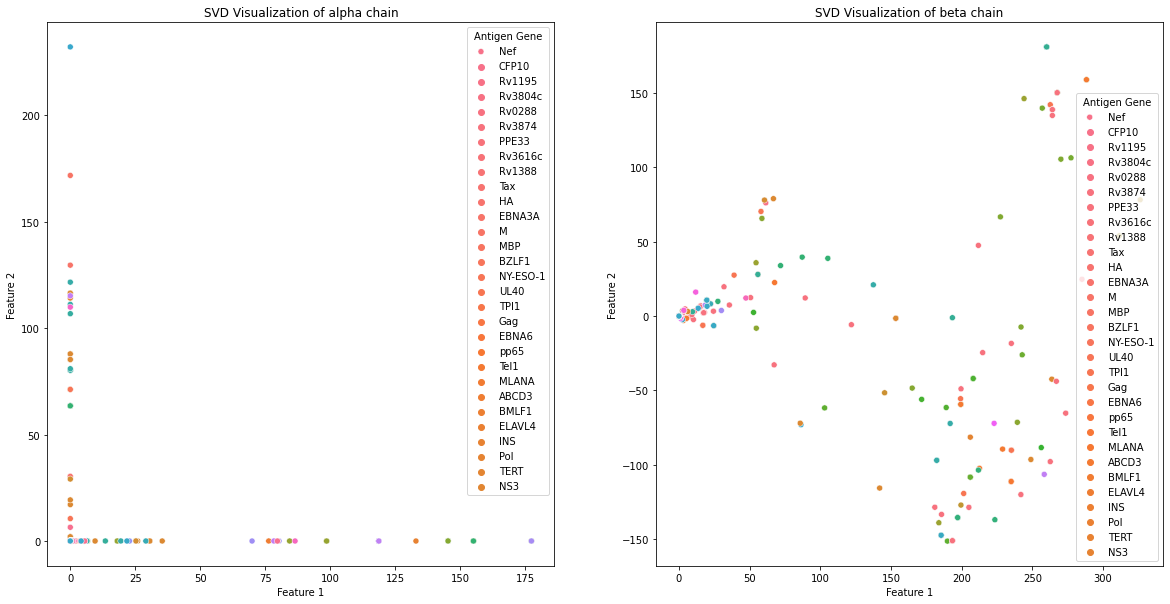

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x=alpha_reduced[:, 0], y=alpha_reduced[:, 1], hue=df_alpha['epitope'], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('SVD Visualization of alpha chain')

# UMAP Visualization
sns.scatterplot(x=beta_reduced[:, 0], y=beta_reduced[:, 1], hue=df_beta['epitope'], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('SVD Visualization of beta chain')

# add legend
ax[0].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')
ax[1].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')

plt.show()

In [40]:
#since the data is in very high dimension, to boost the speed of process
#frist using TruncatedSVD to lower the dimension to 50
svd = TruncatedSVD(n_components=50)
alpha_reduced = svd.fit_transform(tr_a.rw_alpha)
beta_reduced = svd.fit_transform(tr_b.rw_beta)
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.21977604, 0.05909973, 0.03540775, 0.02796493, 0.02177667,
       0.02005728, 0.01911115, 0.01741967, 0.01582711, 0.01237196,
       0.01041129, 0.00958466, 0.00945319, 0.00934623, 0.00893653,
       0.0088613 , 0.00822344, 0.00792864, 0.00766657, 0.0075603 ,
       0.00743256, 0.00596297, 0.00582248, 0.00531947, 0.00527222,
       0.00521295, 0.00516024, 0.00479979, 0.00487172, 0.00480717,
       0.00463785, 0.0045394 , 0.00445478, 0.00420962, 0.00417064,
       0.00399288, 0.00380157, 0.00373422, 0.00361625, 0.00360888,
       0.00323922, 0.00320595, 0.00320388, 0.00318521, 0.00313755,
       0.0031274 , 0.00307432, 0.00303506, 0.00294994, 0.00292756])

In [41]:
alpha_reduced

array([[ 9.01624193e-18, -2.99817459e-17,  9.60308363e-17, ...,
         4.37843590e-17,  3.79307474e-17,  5.15325254e-17],
       [-3.80487022e-17,  1.92568674e-16,  1.52041842e-16, ...,
         2.20741748e-17,  2.30189701e-17,  1.27669232e-16],
       [-3.80487022e-17,  1.92568674e-16,  1.52041842e-16, ...,
         2.20741748e-17,  2.30189701e-17,  1.27669232e-16],
       ...,
       [-2.20457813e-35, -3.20617905e-35,  9.62625841e-34, ...,
         9.70723982e-28,  3.81591890e-28,  1.64935224e-27],
       [ 1.49354920e-35, -3.19029855e-35, -2.92168382e-34, ...,
        -3.95045716e-28,  7.08485287e-28, -1.19523498e-27],
       [ 4.16791945e+00, -1.30855088e-07,  4.74110450e-01, ...,
         1.10437996e+00,  2.53971072e+00,  1.53134113e+00]])

In [42]:
#using Tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
A_tsne = tsne.fit_transform(alpha_reduced[:10000])
B_tsne = tsne.fit_transform(beta_reduced[:10000])
A_tsne

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 19.979284 ,  13.445749 ],
       [ 19.539816 ,  21.7734   ],
       [ 19.838171 ,  20.171274 ],
       ...,
       [ 31.441011 ,  20.601442 ],
       [ 39.66951  ,   8.776607 ],
       [ -1.3857689, -22.085756 ]], dtype=float32)

In [43]:
# using UMAP
# from umap import UMAP
# umap = UMAP(n_components=2, random_state=42)
# A_umap = umap.fit_transform(alpha_reduced[:100])
# B_umap = umap.fit_transform(beta_reduced[:100])

In [44]:
from sklearn.decomposition import PCA

# 创建PCA对象，设置要降维的目标维度为2
pca = PCA(n_components=2)

# 对稀疏矩阵进行PCA降维
A_pca = pca.fit_transform(alpha_reduced)
B_pca= pca.fit_transform(beta_reduced)

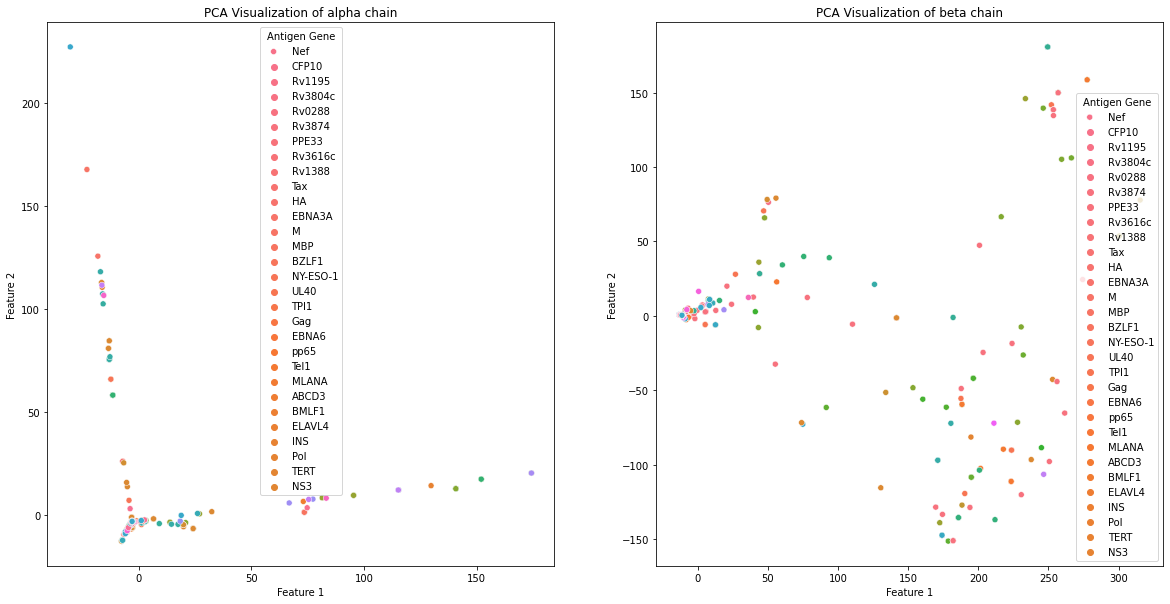

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# t-SNE Visualization
sns.scatterplot(x=A_pca[:, 0], y=A_pca[:, 1], hue=df_alpha['epitope'], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('PCA Visualization of alpha chain')

# UMAP Visualization
sns.scatterplot(x=B_pca[:, 0], y=B_pca[:, 1], hue=df_beta['epitope'], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('PCA Visualization of beta chain')

# add legend
ax[0].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')
ax[1].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')

plt.show()

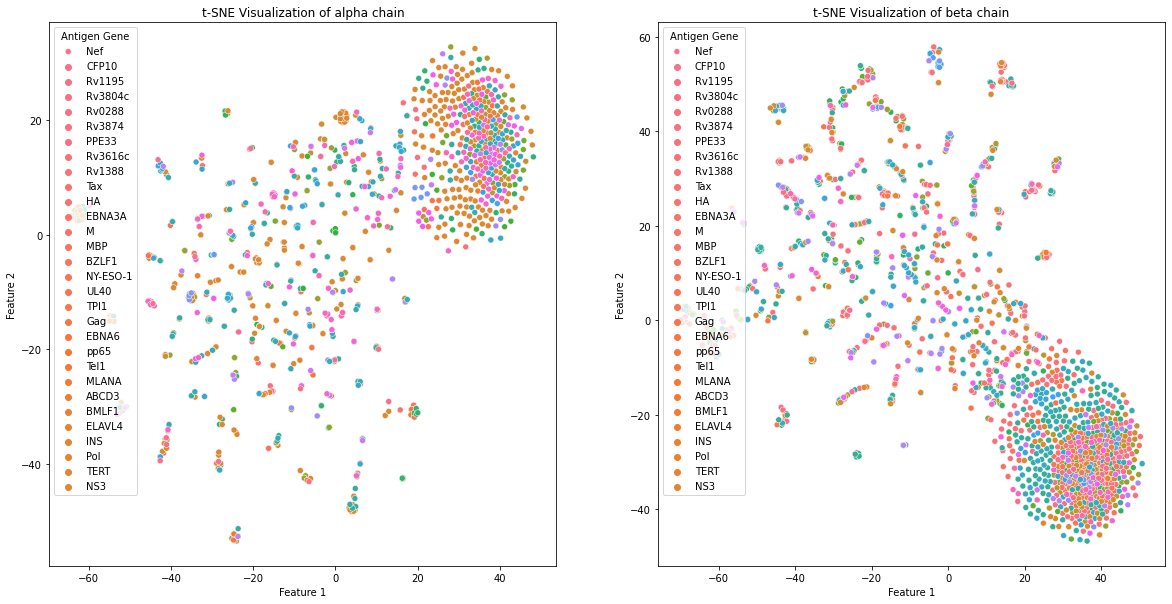

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# t-SNE Visualization
sns.scatterplot(x=A_tsne[:, 0], y=A_tsne[:, 1], hue=df_alpha['epitope'][:10000], ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('t-SNE Visualization of alpha chain')
sns.scatterplot(x=B_tsne[:, 0], y=B_tsne[:, 1], hue=df_beta['epitope'][:10000], ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('t-SNE Visualization of beta chain')
# add legend
ax[0].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')
ax[1].legend(labels=df_alpha['antigen.gene'].unique()[:30], title='Antigen Gene')

plt.show()

In [47]:
# from the comparison of the two pictures,clearly the TSNE method are more likely to shows more defined clusters
# based on our dataset specificity,so we choose TSNE to cluster seperation clearluy

## Kmeans

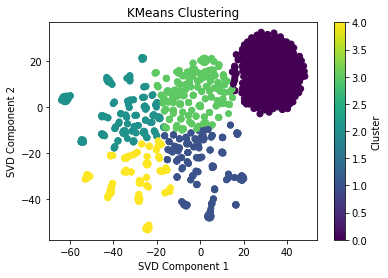

KMeans Silhouette Score: 0.4380256
KMeans Calinski-Harabasz Index: 1771.3796231009792


In [48]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import SpectralClustering

kmeans = KMeans(n_clusters=5)

kmeans.fit_predict(A_tsne)

clusters = kmeans.labels_
# Visualization
plt.scatter(A_tsne[:, 0], A_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()
# 计算轮廓系数和 Calinski-Harabasz 指数
silhouette_avg_kmeans = silhouette_score(A_tsne, clusters)
calinski_harabasz_avg_kmeans = calinski_harabasz_score(A_tsne, clusters)

print("KMeans Silhouette Score:", silhouette_avg_kmeans)
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_avg_kmeans)
#轮廓系数为0.35778168，表明聚类具有中等的质量。虽然样本不是完全分开的（如果是完全分开的，轮廓系数会接近1），但大多数样本有比较清晰的聚类分界。
#Calinski-Harabasz指数为7507.1118086755705，这是一个相对较高的值，表明聚类效果相对较好，聚类内部较为紧凑，而不同聚类之间有较好的分离。

## DBSCAN





In [49]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
A_tsne[A_tsne<0] = 0
distances = pairwise_distances(A_tsne, metric='euclidean')
# 创建 DBSCAN 聚类器
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed')
clusters = dbscan.fit_predict(distances)

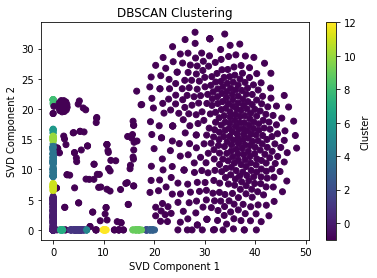

KMeans Silhouette Score: 0.32556918
KMeans Calinski-Harabasz Index: 240.34689932677654


In [50]:
# 绘制聚类结果
plt.scatter(A_tsne[:, 0], A_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# 计算轮廓系数和 Calinski-Harabasz 指数
silhouette_avg_dbscan = silhouette_score(A_tsne, clusters)
calinski_harabasz_avg_dbscan = calinski_harabasz_score(A_tsne, clusters)

print("KMeans Silhouette Score:", silhouette_avg_dbscan)
print("KMeans Calinski-Harabasz Index:", calinski_harabasz_avg_dbscan)

In [51]:
from sklearn.model_selection import train_test_split

# Create an integer encoding dictionary
amino_acid_mapping = {
    'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9,
    'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17,
    'V': 18, 'W': 19, 'Y': 20
}

# Convert the CDR3 sequence to integer representation
def cdr3_to_int(cdr3_seq):
    return [amino_acid_mapping[aa] for aa in cdr3_seq]


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Add clustering results as new features to the original data
filtered_df.loc[:, 'mhc.a'] = df['mhc.a']
filtered_df.loc[:, 'mhc.b'] = df['mhc.b']

# Keep 'cdr3_a_aa', 'epitope', 'v_a_gene', and 'j_a_gene' columns as labels
labels = filtered_df[['cdr3_a_aa', 'epitope', 'v_a_gene', 'j_a_gene','mhc.a','mhc.b']].copy()

# Convert the 'cdr3_a_aa' column to integer encoding
labels['int_cdr3'] = labels['cdr3_a_aa'].apply(cdr3_to_int)

# Remove 'cdr3_a_aa', 'epitope', 'v_a_gene', and 'j_a_gene' columns from features
features = filtered_df.drop(columns=['cdr3_a_aa', 'epitope', 'v_a_gene', 'j_a_gene','mhc.a','mhc.b'])

print(labels)


              cdr3_a_aa          epitope         v_a_gene   j_a_gene  \
0         CIVRAPGRADMRF         FLKEKGGL      TRAV26-1*01  TRAJ43*01   
1        CAVPSGAGSYQLTF         FLKEKGGL        TRAV20*01  TRAJ28*01   
2         CAYRPPGTYKYIF         FLKEKGGL  TRAV38-2/DV8*01  TRAJ40*01   
9      CIVKTNSGGSNYKLTF  TAAQAAVVRFQEAAN      TRAV26-1*01  TRAJ53*01   
10     CIVHTNSGGSNYKLTF  TAAQAAVVRFQEAAN      TRAV26-1*01  TRAJ53*01   
...                 ...              ...              ...        ...   
1376         CIALNARLMF     PQPELPYPQPQL      TRAV26-1*01  TRAJ31*01   
1377   CAMREGRYSSASKIIF     FPQPEQPFPWQP    TRAV14/DV4*01   TRAJ3*01   
1378   CLVGDGDGGATNKLIF     FPQPEQPFPWQP         TRAV4*01  TRAJ32*01   
1379  CAASVLYGSSNTGKLIF     QLQPFPQPELPY    TRAV29/DV5*01  TRAJ37*01   
1380       CAPQGATNKLIF    PQQPFPQPEQPFP      TRAV12-2*01  TRAJ32*01   

               mhc.a           mhc.b  \
0           HLA-B*08             B2M   
1           HLA-B*08             B2M   
2           HLA

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2320\4055530858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'mhc.a'] = df['mhc.a']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2320\4055530858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'mhc.b'] = df['mhc.b']


In [60]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score


# Using integer-encoded sequences and V gene, J gene, mhc.a, mhc.b as features, with 'epitope' as the target column
X_cdr3_padded = pad_sequences(labels['int_cdr3'], padding='post')  # Using pad_sequences function to pad sequences to the same length
X_v_gene = np.array(labels['v_a_gene'])
X_j_gene = np.array(labels['j_a_gene'])
X_mhc_a = np.array(labels['mhc.a'])
X_mhc_b = np.array(labels['mhc.b'])

y = np.array(labels['epitope'])

# Split the dataset into training and testing sets
X_train, X_test, X_v_gene_train, X_v_gene_test, X_j_gene_train, X_j_gene_test,  X_mhc_a_train, X_mhc_a_test, X_mhc_b_train, X_mhc_b_test, y_train, y_test = train_test_split(X_cdr3_padded, X_v_gene, X_j_gene,  X_mhc_a, X_mhc_b, y, test_size=0.2, random_state=42)

# Encode V gene and J gene as integers
v_gene_mapping = {gene: idx for idx, gene in enumerate(np.unique(X_v_gene))}
j_gene_mapping = {gene: idx for idx, gene in enumerate(np.unique(X_j_gene))}
mhc_a_mapping = {a: idx for idx, a in enumerate(np.unique(X_mhc_a))}  
mhc_b_mapping = {b: idx for idx, b in enumerate(np.unique(X_mhc_b))}  

X_v_gene_train_int = np.array([v_gene_mapping[gene] for gene in X_v_gene_train])
X_v_gene_test_int = np.array([v_gene_mapping[gene] for gene in X_v_gene_test])

X_j_gene_train_int = np.array([j_gene_mapping[gene] for gene in X_j_gene_train])
X_j_gene_test_int = np.array([j_gene_mapping[gene] for gene in X_j_gene_test])

X_mhca_train_int = np.array([mhc_a_mapping[a] for a in X_mhc_a_train])
X_mhca_test_int = np.array([mhc_a_mapping[a] for a in X_mhc_a_test])

X_mhcb_train_int = np.array([mhc_b_mapping[b] for b in X_mhc_b_train])
X_mhcb_test_int = np.array([mhc_b_mapping[b] for b in X_mhc_b_test])

# Combine features, including cluster_label feature
X_train = np.column_stack((X_train, X_v_gene_train_int, X_j_gene_train_int, X_mhca_train_int, X_mhcb_train_int))
X_test = np.column_stack((X_test, X_v_gene_test_int, X_j_gene_test_int,  X_mhca_test_int, X_mhcb_test_int))


In [64]:
# Define the range of tree numbers
tree_range = range(10, 201, 10)
best_accuracy = 0
best_tree = None

# Loop through different numbers of trees
for n_trees in tree_range:
    # Create a random forest classifier object
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Evaluate model performance using cross-validation
    cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate the mean accuracy of cross-validation
    mean_accuracy = np.mean(cv_scores)
    
    # If the accuracy of the current model is higher, update the best model and the best number of trees
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_tree = n_trees

# Output the best number of trees and the best accuracy
print("Best Number of Trees:", best_tree)
print("Best Accuracy:", best_accuracy)


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

Best Number of Trees: 150
Best Accuracy: 0.6886203800688314


In [65]:
# Create a random forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
# Train the random forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Cross Validation Mean Accuracy:", np.mean(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Mean Accuracy: 0.6886203800688314
Precision: 0.6617599015439696
Recall: 0.697560975609756
F1 Score: 0.6449713655574976
Accuracy: 0.697560975609756


C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The average accuracy of cross validation is about 0.68, indicating that the model achieved an average accuracy of 68% on different subsets of the training data.
The values of Precision, Recall, and F1 score are 0.66, 0.70, and 0.65, respectively. Accuracy is the ratio of the number of correctly predicted antigen-specific samples to the number of all predicted antigen-specific samples. Recall is the ratio of correctly predicted antigen-specific samples to the actual antigen-specific samples. F1 score is the harmonic mean of accuracy and recall, which combines the accuracy and recall of the model.
The accuracy on the test set is about 0.70, indicating that the model's prediction accuracy on unseen data is 70%.
Overall, the model performs average in predicting antigen specificity, with an accuracy slightly below 70%, and the accuracy, recall, and F1 score are also not high

In [56]:
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) classifier object
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.5560975609756098


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Tree classifier object
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting Tree classifier
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.7170731707317073


In [58]:
from sklearn.neural_network import MLPClassifier

# Create a Multi-layer Perceptron (MLP) classifier object
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the MLP classifier
nn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn_classifier.predict(X_test)

# Evaluate the model performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)

Neural Network Accuracy: 0.5853658536585366
